In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
from imputation import imputed_vals, run, imputed_sqr_err
from utils.forgetter import forget_random_col_per_sample_2

In [3]:
seed = 42

In [4]:
random_state = np.random.RandomState(seed)
random_generator = np.random.default_rng(seed)

In [5]:
df = pd.read_csv("data/2-test_df.csv", index_col="Unnamed: 0")
df

,age,T3,T4U,FTI,TT4,TSH,on_antithyroid_meds,on_thyroxine,thyroid_surgery,sick,tumor,goitre,pregnant,I131_treatment,lithium,sex,psych
6364,49.0,0.3,0.88,77.0,68.0,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7417,73.0,1.9,0.83,119.0,99.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
982,62.0,1.3,0.85,128.0,109.0,0.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,72.0,2.2,1.08,115.0,124.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5633,63.0,2.0,1.14,119.0,136.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,74.0,2.6,1.18,111.0,131.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3083,17.0,1.2,1.50,24.0,36.0,145.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,79.0,2.2,1.13,108.0,122.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5443,73.0,2.1,1.11,116.0,130.0,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
qualitative_cols_f = open('data/qualitative_cols.json', 'r')
categorical_cols_f = open('data/categorical_cols.json', 'r')

In [7]:
complete_vals_df = pd.read_csv("data/5-train_df.csv", index_col="Unnamed: 0") 
remove_vals_df = pd.read_csv("data/5-test_df.csv", index_col="Unnamed: 0") 
missing_vals_idxs = list(remove_vals_df.index)

In [8]:
sel_qual_cols = json.load(qualitative_cols_f)
sel_cat_cols = json.load(categorical_cols_f)

In [9]:
weight_map = {
    "age" : 1,
    "T3"  : 1,
    "T4U" : 1,
    "TSH" : 1,
    "TT4" : 1,
    "FTI" : 1
}

In [10]:
missing_vals_df, missing_col_map, missing_vals_idxs, picked_cols = forget_random_col_per_sample_2(remove_vals_df, weight_map, random_generator)

real_df = pd.concat([complete_vals_df, remove_vals_df])
curr_df = pd.concat([complete_vals_df, missing_vals_df])

In [11]:
neighbours = 10

In [12]:
knn_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "kNN",
                        config={
                            "n_neighbors": neighbours
                        }, estimator_config={})
knn_imputed_df

,age (real),age (imputed),T3 (real),T3 (imputed),T4U (real),T4U (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),...,pregnant (imputed),I131_treatment (real),I131_treatment (imputed),lithium (real),lithium (imputed),sex (real),sex (imputed),psych (real),psych (imputed),imputed
3196,76.0,76.0,0.5,0.5,0.85,0.85,153.0,153.0,130.0,114.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,57.0,57.0,1.8,1.8,1.38,1.08,59.0,59.0,81.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,86.0,86.0,2.0,2.0,0.62,0.62,126.0,118.2,79.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,37.0,37.0,2.3,2.3,0.94,0.94,72.0,72.0,68.0,84.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,TT4
4300,63.0,53.5,2.0,2.0,1.18,1.18,129.0,129.0,152.0,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,39.0,46.4,1.8,1.8,0.94,0.94,97.0,97.0,91.0,91.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,age
8024,26.0,46.6,2.6,2.6,0.89,0.89,107.0,107.0,95.0,95.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,age
4111,24.0,24.0,2.3,2.3,1.09,1.09,67.0,67.0,73.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,70.0,41.3,1.9,1.9,0.87,0.87,100.0,100.0,87.0,87.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,age


In [13]:
wknn_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "WkNN",
                         config={
                             "n_neighbors": neighbours
                         }, estimator_config={})
wknn_imputed_df

,age (real),age (imputed),T3 (real),T3 (imputed),T4U (real),T4U (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),...,pregnant (imputed),I131_treatment (real),I131_treatment (imputed),lithium (real),lithium (imputed),sex (real),sex (imputed),psych (real),psych (imputed),imputed
3196,76.0,76.000000,0.5,0.5,0.85,0.850000,153.0,153.000000,130.0,114.425083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,57.0,57.000000,1.8,1.8,1.38,1.085304,59.0,59.000000,81.0,81.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,86.0,86.000000,2.0,2.0,0.62,0.620000,126.0,117.894191,79.0,79.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,37.0,37.000000,2.3,2.3,0.94,0.940000,72.0,72.000000,68.0,84.053109,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,TT4
4300,63.0,53.557359,2.0,2.0,1.18,1.180000,129.0,129.000000,152.0,152.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,39.0,57.989306,1.8,1.8,0.94,0.940000,97.0,97.000000,91.0,91.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,age
8024,26.0,45.670988,2.6,2.6,0.89,0.890000,107.0,107.000000,95.0,95.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,age
4111,24.0,24.000000,2.3,2.3,1.09,1.090000,67.0,67.000000,73.0,73.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,70.0,42.561385,1.9,1.9,0.87,0.870000,100.0,100.000000,87.0,87.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,age


In [14]:
iters = 10

In [15]:
mice_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "MICE",
                         config={
                             "random_state": random_state, 
                             "max_iter": iters
                         }, estimator_config={})
mice_imputed_df

,age (real),age (imputed),T3 (real),T3 (imputed),T4U (real),T4U (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),...,pregnant (imputed),I131_treatment (real),I131_treatment (imputed),lithium (real),lithium (imputed),sex (real),sex (imputed),psych (real),psych (imputed),imputed
3196,76.0,76.000000,0.5,0.5,0.85,0.850000,153.0,153.000000,130.0,131.564011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,57.0,57.000000,1.8,1.8,1.38,1.159709,59.0,59.000000,81.0,81.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,86.0,86.000000,2.0,2.0,0.62,0.620000,126.0,124.164156,79.0,79.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,37.0,37.000000,2.3,2.3,0.94,0.940000,72.0,72.000000,68.0,67.464373,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,TT4
4300,63.0,49.108197,2.0,2.0,1.18,1.180000,129.0,129.000000,152.0,152.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,39.0,39.856384,1.8,1.8,0.94,0.940000,97.0,97.000000,91.0,91.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,age
8024,26.0,43.985941,2.6,2.6,0.89,0.890000,107.0,107.000000,95.0,95.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,age
4111,24.0,24.000000,2.3,2.3,1.09,1.090000,67.0,67.000000,73.0,73.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,70.0,52.955866,1.9,1.9,0.87,0.870000,100.0,100.000000,87.0,87.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,age


In [16]:
mice_rf_imputed_df, _ = run(real_df, curr_df, missing_vals_idxs, picked_cols, "MICE RF",
                            config={
                                "random_state": random_state, 
                                "max_iter": iters
                            }, estimator_config={
                                "n_estimators":4,
                                "max_depth": 10,
                                "bootstrap": True,
                                "max_samples": 0.5,
                                "random_state": random_state,
                            })
mice_rf_imputed_df

,age (real),age (imputed),T3 (real),T3 (imputed),T4U (real),T4U (imputed),FTI (real),FTI (imputed),TT4 (real),TT4 (imputed),...,pregnant (imputed),I131_treatment (real),I131_treatment (imputed),lithium (real),lithium (imputed),sex (real),sex (imputed),psych (real),psych (imputed),imputed
3196,76.0,76.000000,0.5,0.5,0.85,0.850000,153.0,153.0,130.0,132.660714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TT4
1736,57.0,57.000000,1.8,1.8,1.38,1.193063,59.0,59.0,81.0,81.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T4U
1836,86.0,86.000000,2.0,2.0,0.62,0.620000,126.0,127.2,79.0,79.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTI
4819,37.0,37.000000,2.3,2.3,0.94,0.940000,72.0,72.0,68.0,68.066667,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,TT4
4300,63.0,53.699617,2.0,2.0,1.18,1.180000,129.0,129.0,152.0,152.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,39.0,52.715674,1.8,1.8,0.94,0.940000,97.0,97.0,91.0,91.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,age
8024,26.0,44.839882,2.6,2.6,0.89,0.890000,107.0,107.0,95.0,95.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,age
4111,24.0,24.000000,2.3,2.3,1.09,1.090000,67.0,67.0,73.0,73.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TSH
2694,70.0,54.473015,1.9,1.9,0.87,0.870000,100.0,100.0,87.0,87.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,age


In [17]:
real_cols = [col + " (real)" for col in sel_qual_cols]
imputed_cols = [col + " (imputed)" for col in sel_qual_cols]

In [18]:
def sturges(size : int) -> int:
    return 1 + math.ceil(math.log2(size))

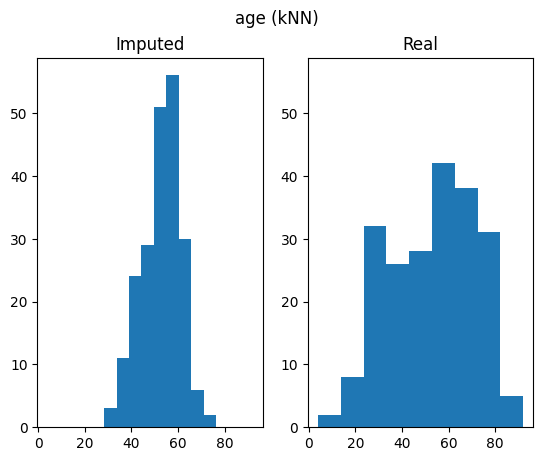

None

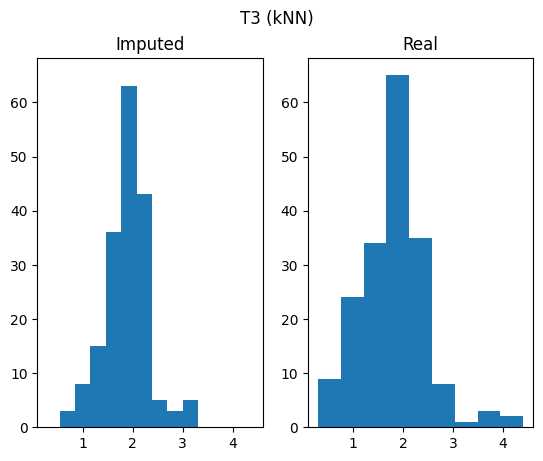

None

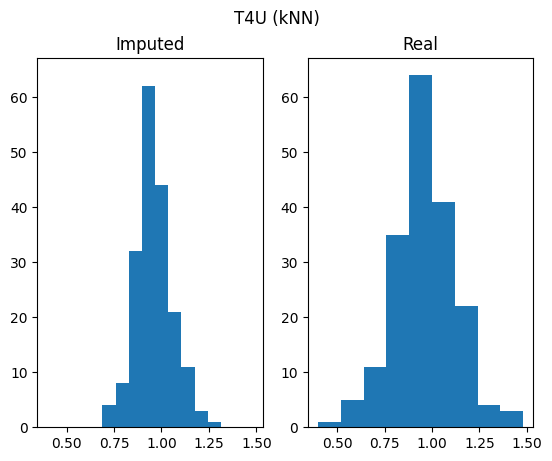

None

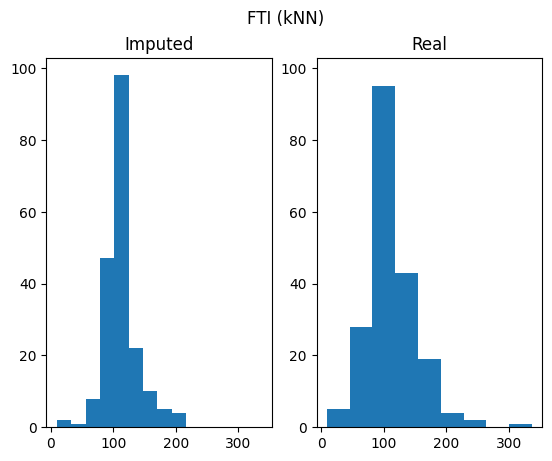

None

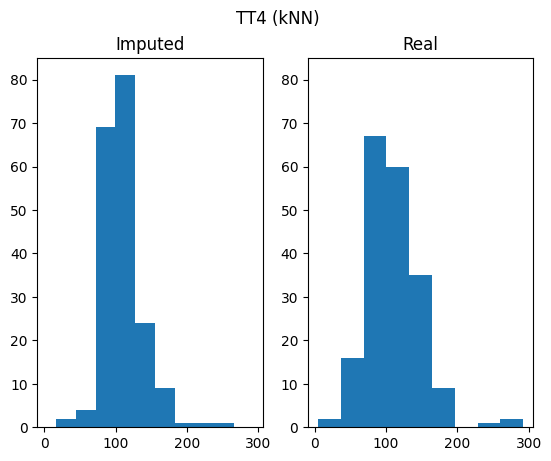

None

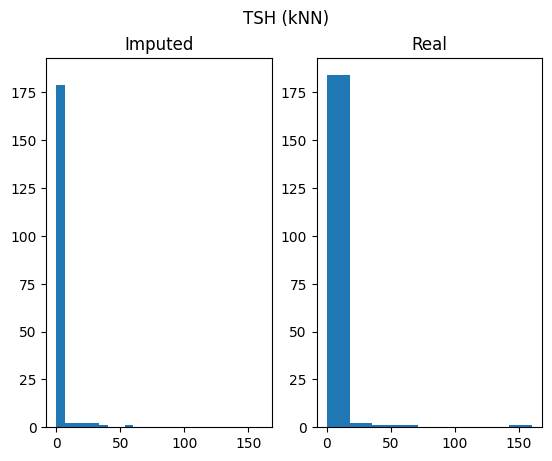

None

In [19]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, knn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (kNN)")
        display(plt.show())

## WKNN

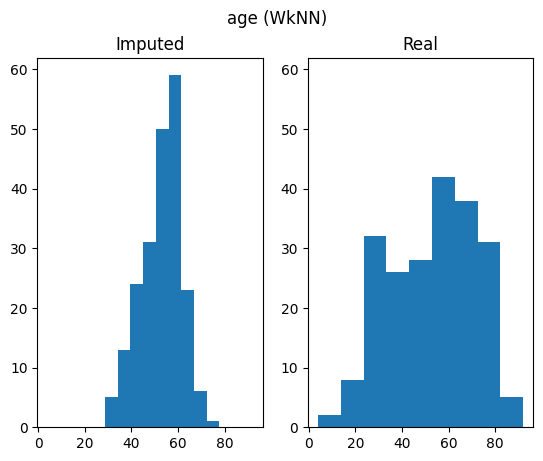

None

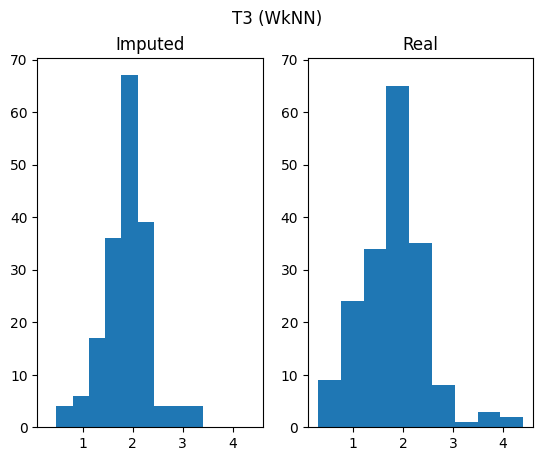

None

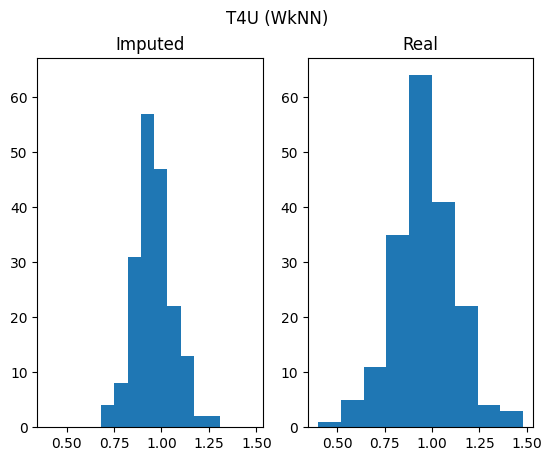

None

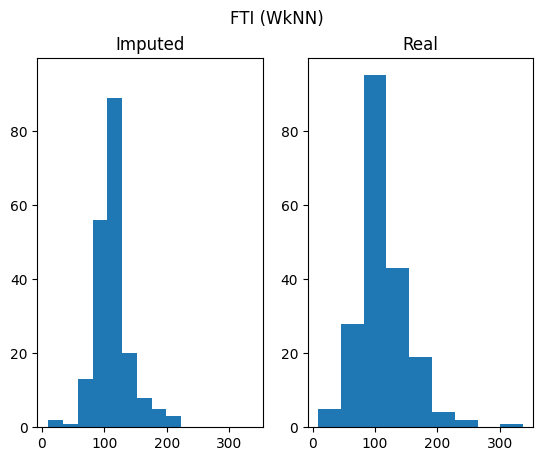

None

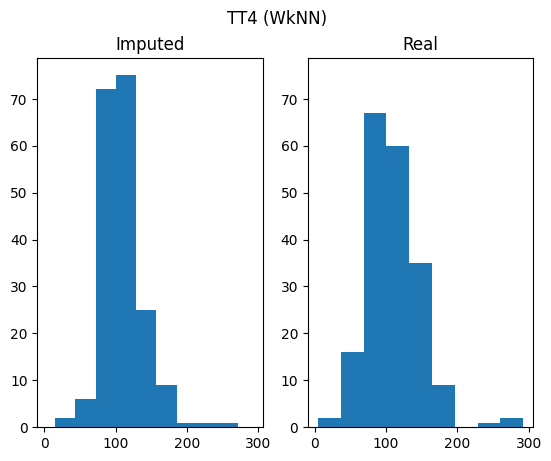

None

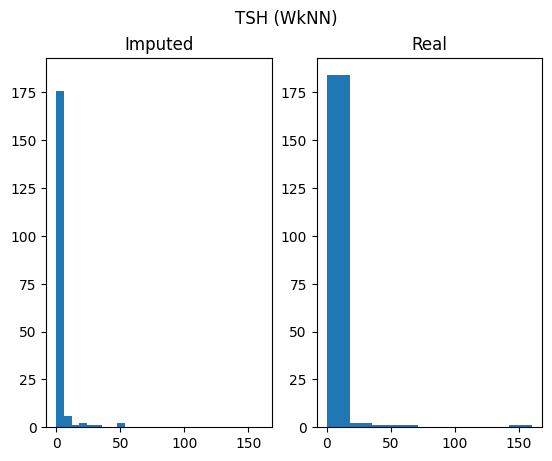

None

In [20]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, wknn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (WkNN)")
        display(plt.show())

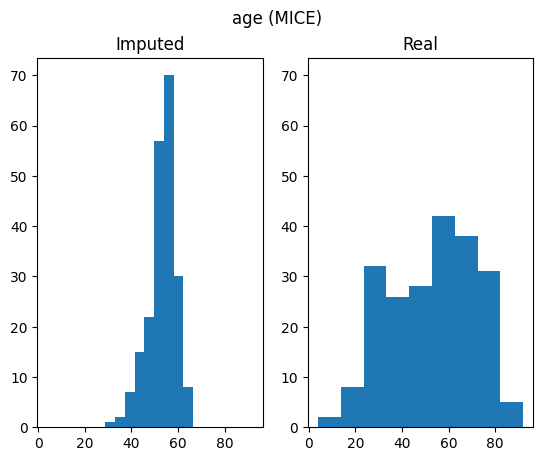

None

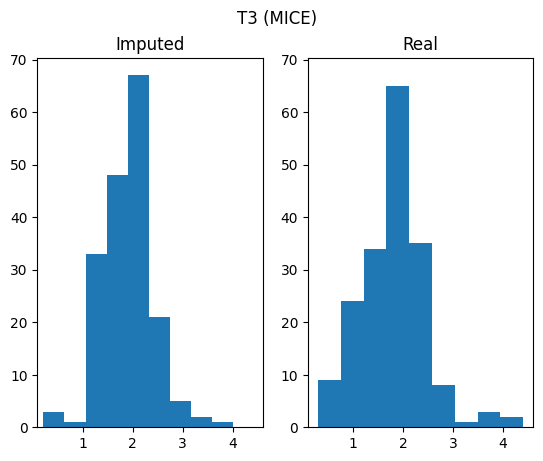

None

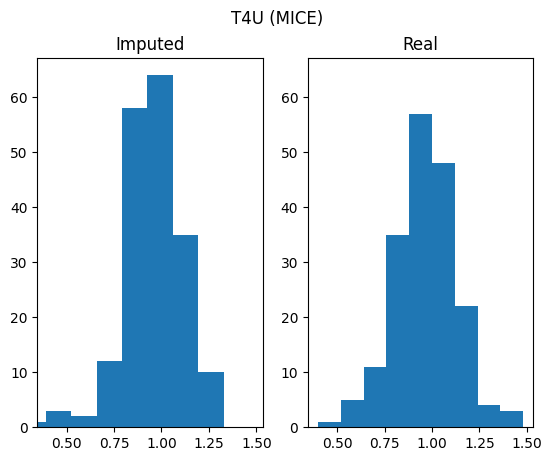

None

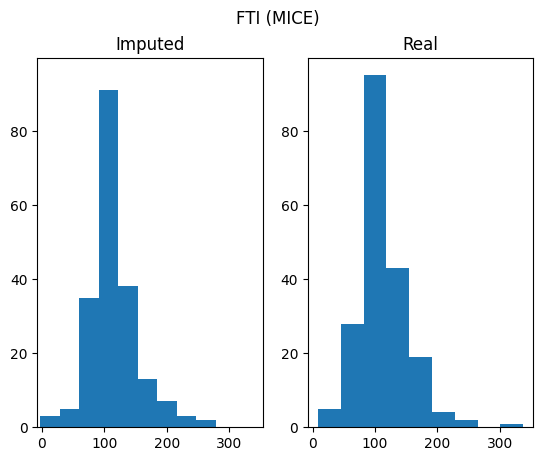

None

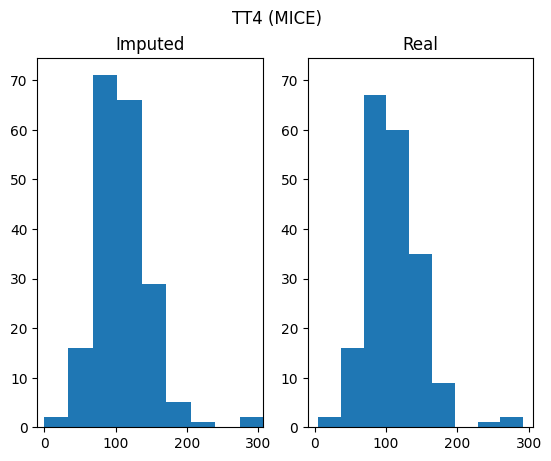

None

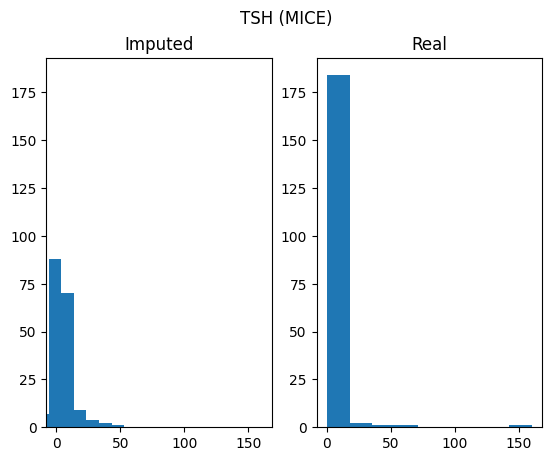

None

In [21]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE)")
        display(plt.show())

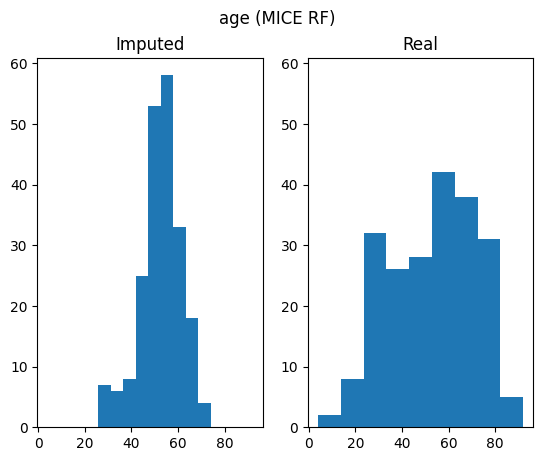

None

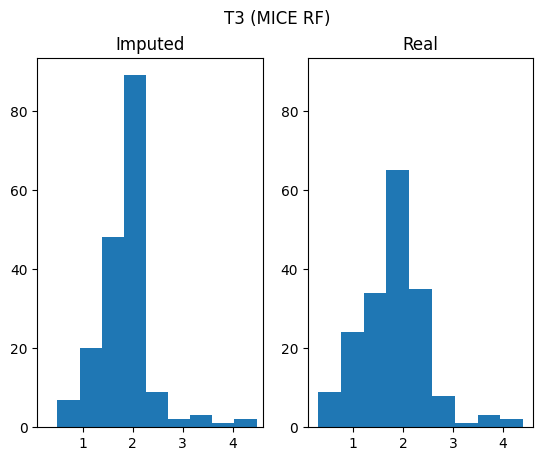

None

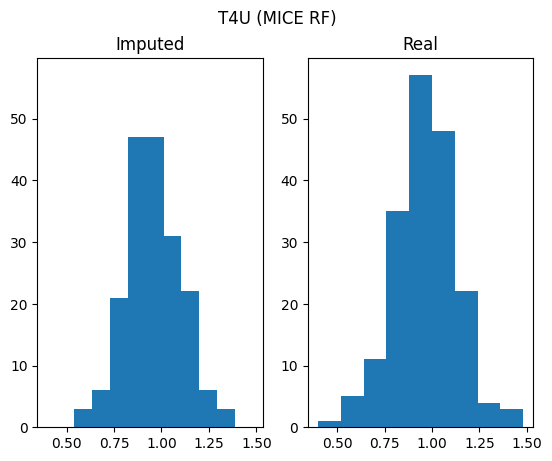

None

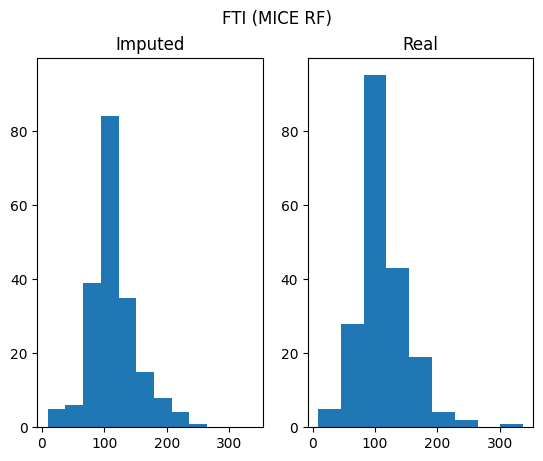

None

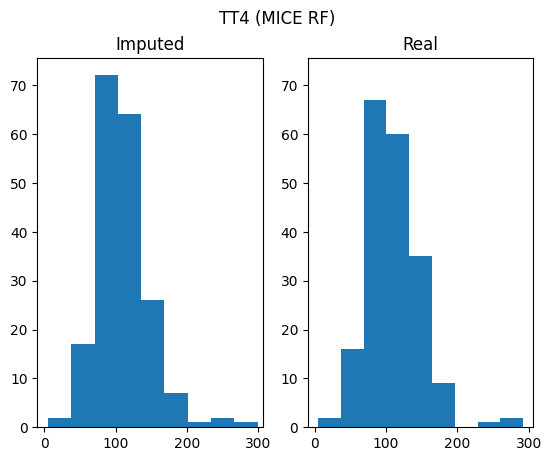

None

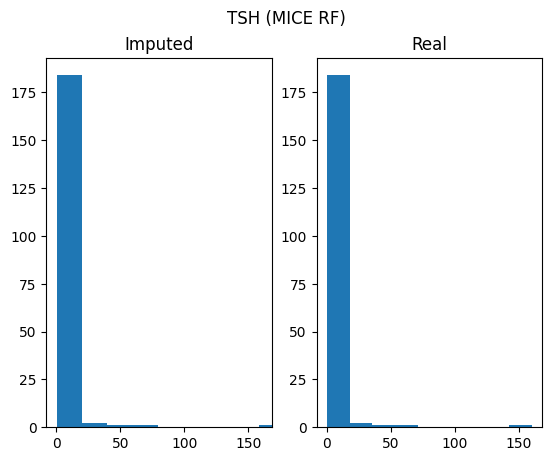

None

In [22]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_rf_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].hist(x=imputed_dict[col], bins=sturges(len(imputed_dict[col])))
        ax[1].hist(x=real_dict[col], bins=sturges(len(real_dict[col])))
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        true_ylim_max = max([imputed_ylim[1], real_ylim[1]])
        real_xlim = ax[1].get_xlim()
        min_val = real_xlim[0]
        max_val = real_xlim[1]
        ax[0].set_xlim((min_val, max_val))
        ax[1].set_xlim((min_val, max_val))
        ax[0].set_ylim((0, true_ylim_max))
        ax[1].set_ylim((0, true_ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE RF)")
        display(plt.show())

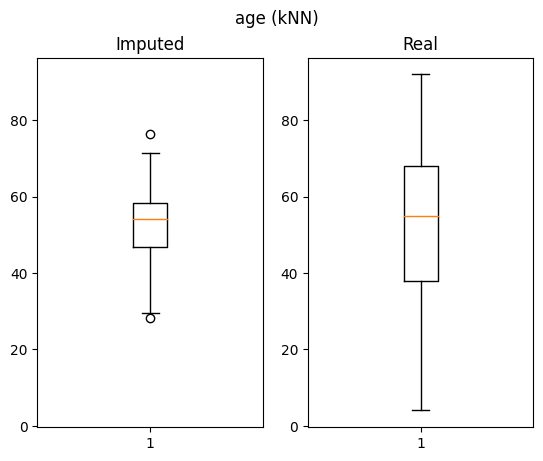

None

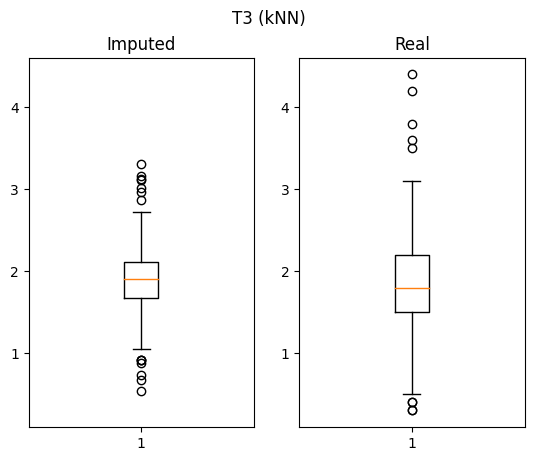

None

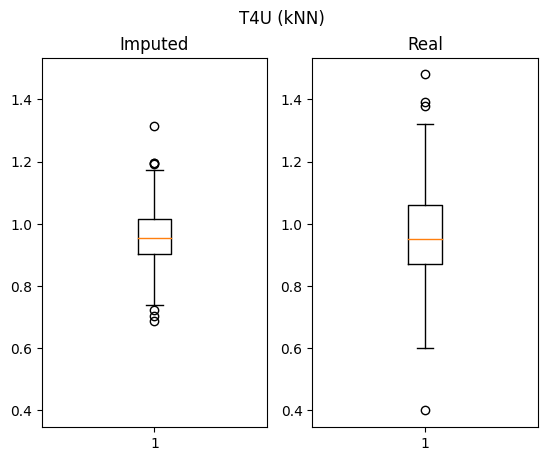

None

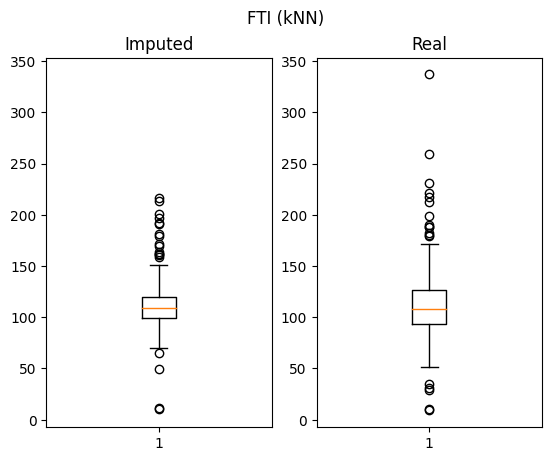

None

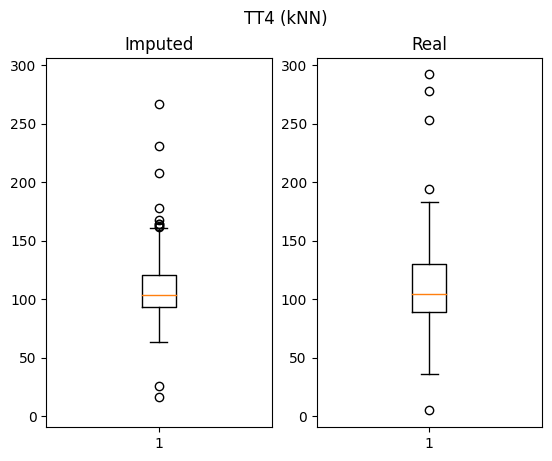

None

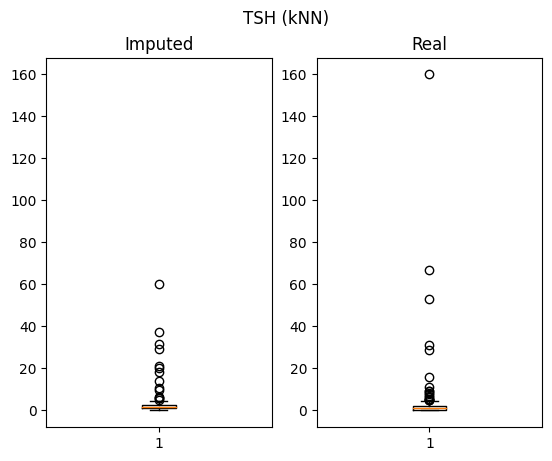

None

In [23]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, knn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (kNN)")
        display(plt.show())

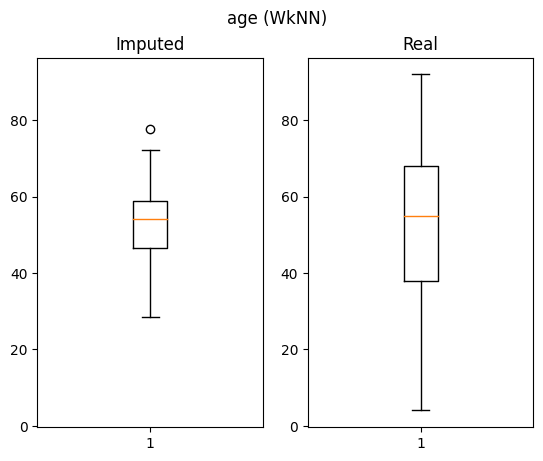

None

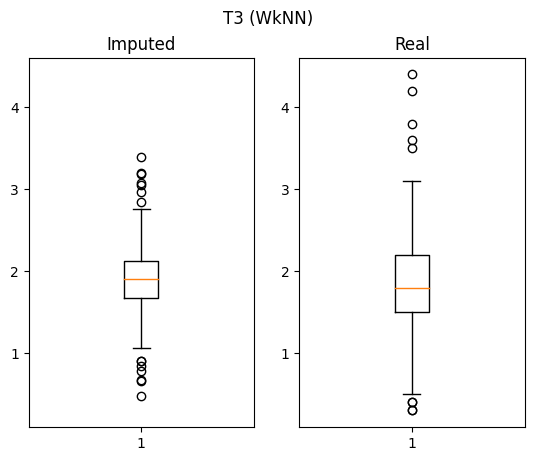

None

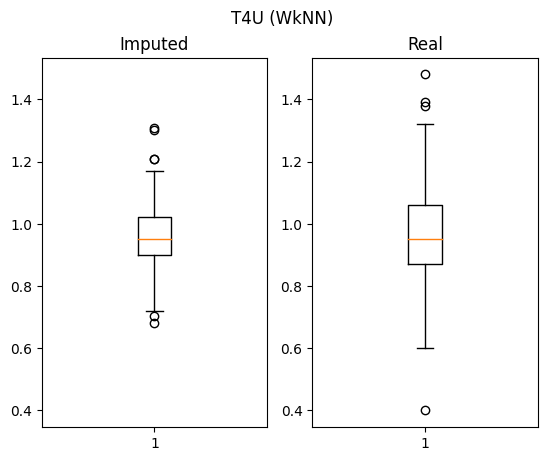

None

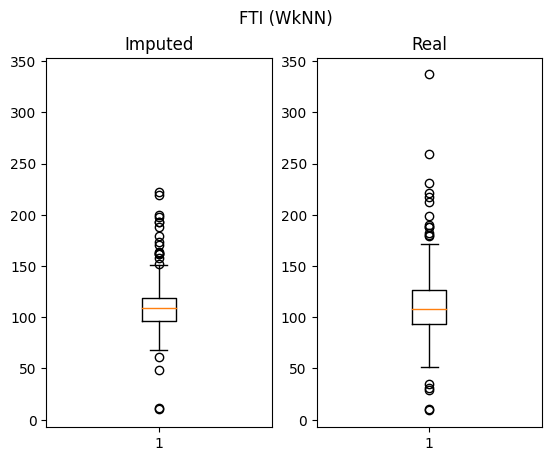

None

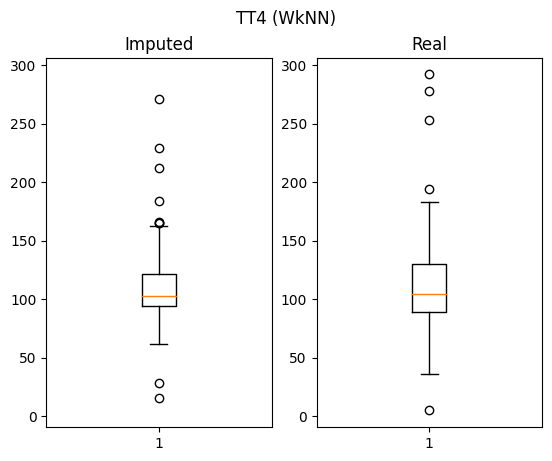

None

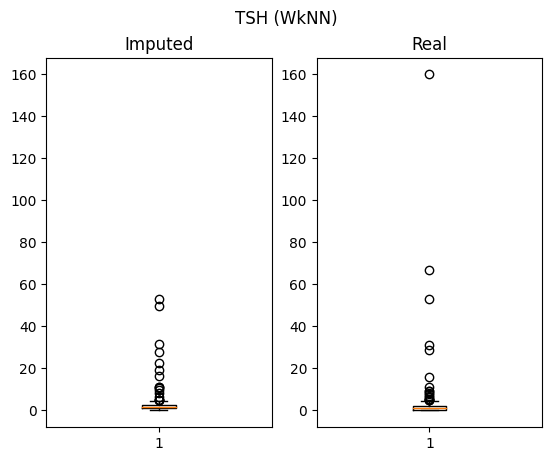

None

In [24]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, wknn_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (WkNN)")
        display(plt.show())

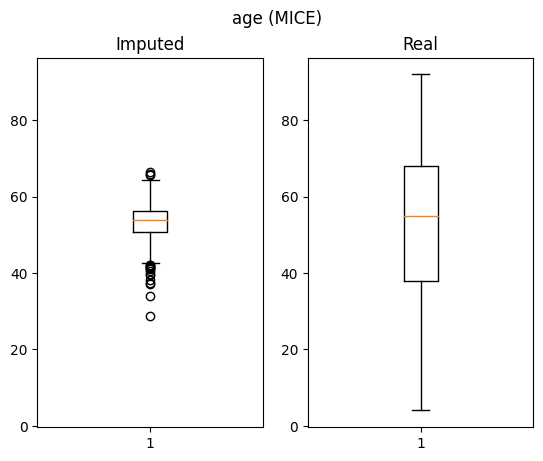

None

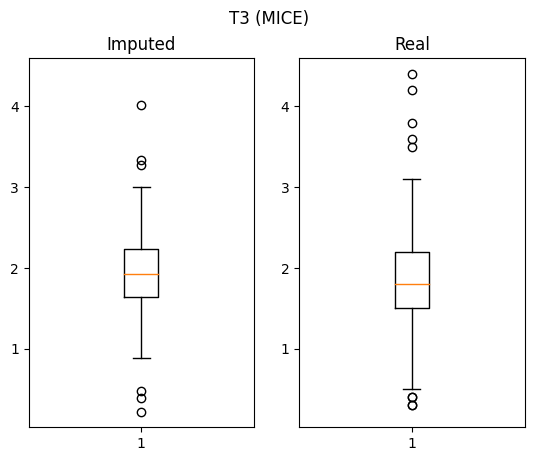

None

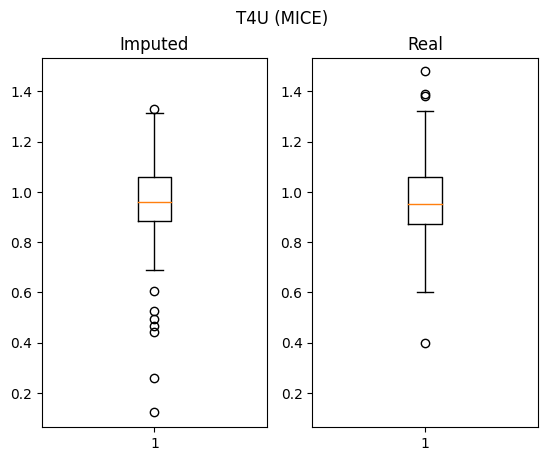

None

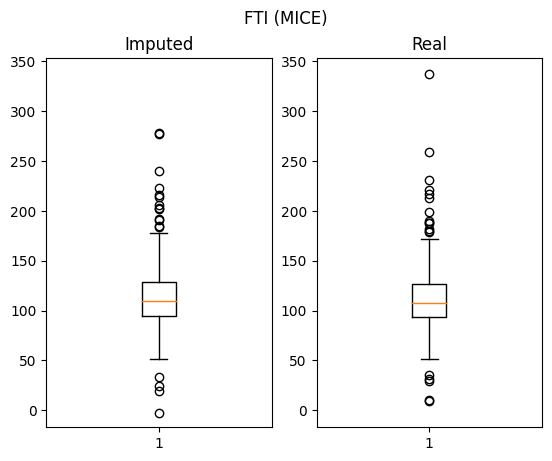

None

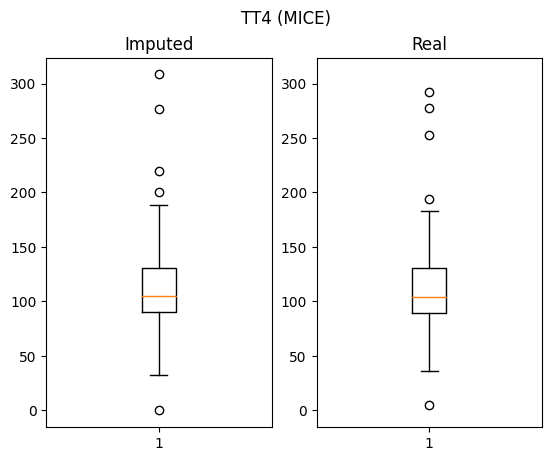

None

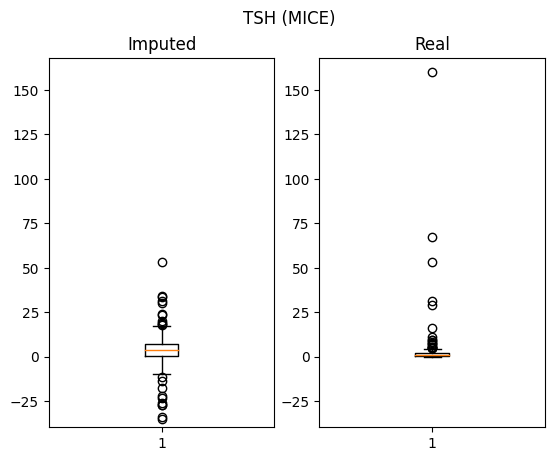

None

In [25]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE)")
        display(plt.show())

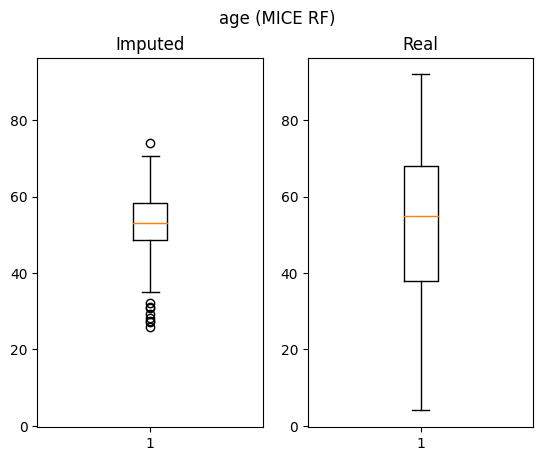

None

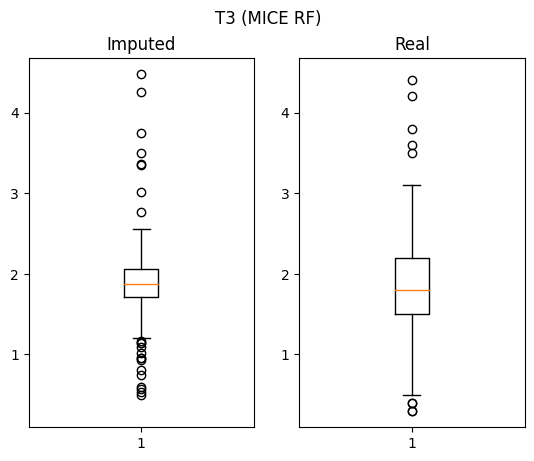

None

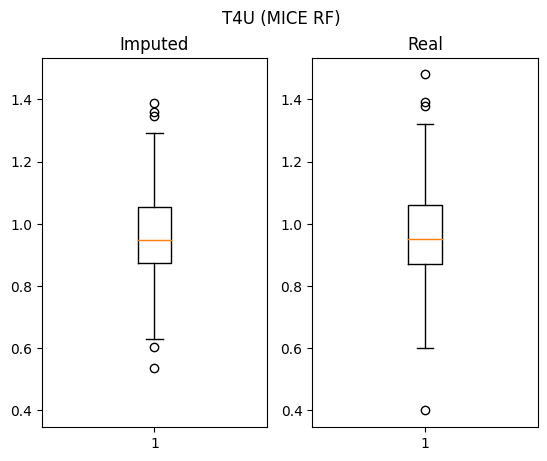

None

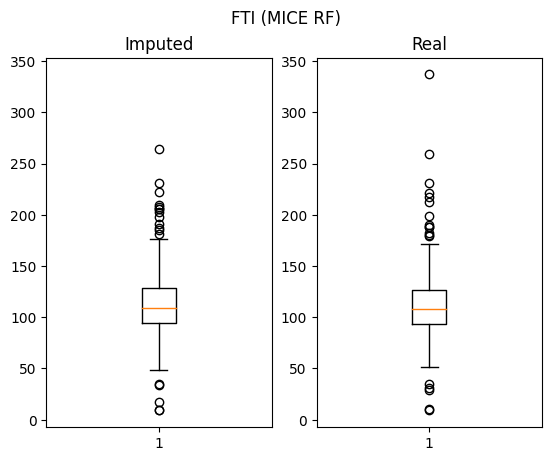

None

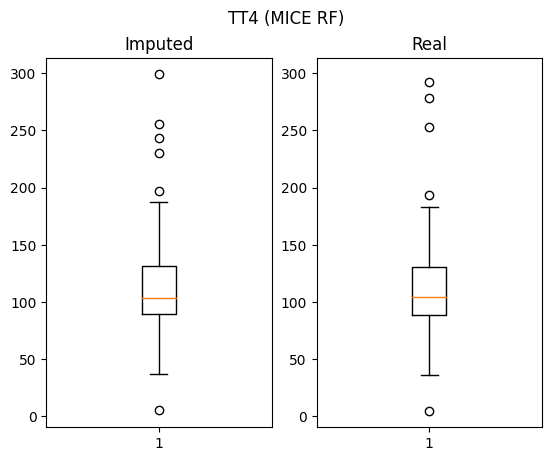

None

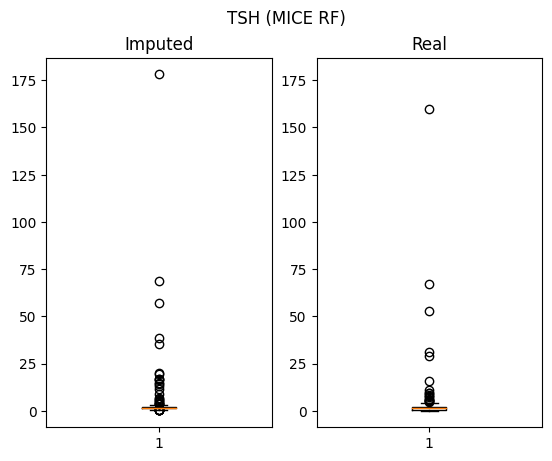

None

In [26]:
imputed_dict, real_dict = imputed_vals(sel_qual_cols, mice_rf_imputed_df)
for col in sel_qual_cols:
    if col not in sel_cat_cols:
        _, ax = plt.subplots(1, 2)
        ax[0].boxplot(x=imputed_dict[col])
        ax[1].boxplot(x=real_dict[col])
        imputed_ylim = ax[0].get_ylim()
        real_ylim = ax[1].get_ylim()
        ylim_min = min([imputed_ylim[0], real_ylim[0]])
        ylim_max = max([imputed_ylim[1], real_ylim[1]])
        ax[0].set_ylim((ylim_min, ylim_max))
        ax[1].set_ylim((ylim_min, ylim_max))
        ax[0].set_title("Imputed")
        ax[1].set_title("Real")
        plt.suptitle(col + " (MICE RF)")
        display(plt.show())

In [27]:
imputed_sqr_err(sel_qual_cols, knn_imputed_df)

{'age': 336.1682075471696,
 'T3': 0.2822059828950277,
 'T4U': 0.00954405784946236,
 'FTI': 320.8451453577117,
 'TT4': 266.55303124999983,
 'TSH': 85.32753659263805}

In [28]:
imputed_sqr_err(sel_qual_cols, wknn_imputed_df)

{'age': 336.4968274675988,
 'T3': 0.2783546525969514,
 'T4U': 0.009228390173578542,
 'FTI': 281.6857565745025,
 'TT4': 240.32764390145795,
 'TSH': 89.14824334334514}

In [29]:
imputed_sqr_err(sel_qual_cols, mice_imputed_df)

{'age': 308.77129383192795,
 'T3': 0.29370190127067514,
 'T4U': 0.004002919761379628,
 'FTI': 71.79634418182677,
 'TT4': 88.44405932735508,
 'TSH': 148.40942463736795}

In [30]:
display(knn_imputed_df[real_cols].mean())
display(knn_imputed_df[imputed_cols].mean())

age (real)     54.412273
T3 (real)       1.948487
T4U (real)      0.973673
FTI (real)    113.440277
TT4 (real)    108.774417
TSH (real)      4.889823
dtype: float64

age (imputed)     54.372861
T3 (imputed)       1.959880
T4U (imputed)      0.973564
FTI (imputed)    113.199615
TT4 (imputed)    108.648073
TSH (imputed)      4.856204
dtype: float64

In [31]:
display(knn_imputed_df[real_cols].std())
display(knn_imputed_df[imputed_cols].std())

age (real)    18.378102
T3 (real)      0.787096
T4U (real)     0.189116
FTI (real)    38.032258
TT4 (real)    37.283235
TSH (real)    23.853609
dtype: float64

age (imputed)    17.025089
T3 (imputed)      0.762087
T4U (imputed)     0.182020
FTI (imputed)    36.123237
TT4 (imputed)    35.982467
TSH (imputed)    23.372800
dtype: float64

In [32]:
display(wknn_imputed_df[real_cols].mean())
display(wknn_imputed_df[imputed_cols].mean())

age (real)     54.412273
T3 (real)       1.948487
T4U (real)      0.973673
FTI (real)    113.440277
TT4 (real)    108.774417
TSH (real)      4.889823
dtype: float64

age (imputed)     54.392989
T3 (imputed)       1.959876
T4U (imputed)      0.973727
FTI (imputed)    113.216698
TT4 (imputed)    108.686724
TSH (imputed)      4.862822
dtype: float64

In [33]:
display(wknn_imputed_df[real_cols].std())
display(wknn_imputed_df[imputed_cols].std())

age (real)    18.378102
T3 (real)      0.787096
T4U (real)     0.189116
FTI (real)    38.032258
TT4 (real)    37.283235
TSH (real)    23.853609
dtype: float64

age (imputed)    17.044700
T3 (imputed)      0.763175
T4U (imputed)     0.182355
FTI (imputed)    36.212629
TT4 (imputed)    36.062664
TSH (imputed)    23.375982
dtype: float64